In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf


In [2]:
# Block of Code to show FIT Image

# bins, intensities  = hf.CreateData('180NoBRun1.txt')
# bins, intensities =  np.array(bins), np.array(intensities)
# hf.Plots(bins, intensities, "B=0.384 kG, Polarize = 180 deg, Intensity Plot - Full set", 'Bins', 'Intensity [ADU] ', figsize0= 15, figsize1=4)

In [3]:
# STEP 1: Load Data 
xy = np.loadtxt('XYR3_90_Dic.txt', dtype=int, delimiter=',')
print(type(xy))
print(f"Number of trials to examine = {len(xy)/2}\nTotal Number of arrays = {len(xy)}")

<class 'numpy.ndarray'>
Number of trials to examine = 11.0
Total Number of arrays = 22


In [4]:
# # STEP 2: Check all graphs  

# hf.MakeManyPlots(xy)

Data ratio set


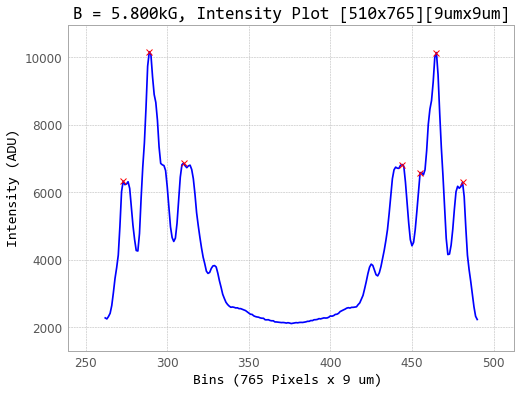

In [44]:
# STEP 5: TRUNCATE TO THE FIRST ORDER
peaks1, x_1, y_1 = hf.LabelPeaks_ShrinkData(xy[0],xy[1],262,490,4000)
peaks2, x_2, y_2 = hf.LabelPeaks_ShrinkData(xy[2],xy[3],262,490,4300)
peaks3, x_3, y_3 = hf.LabelPeaks_ShrinkData(xy[4],xy[5],262,490,4300)
peaks4, x_4, y_4 = hf.LabelPeaks_ShrinkData(xy[6],xy[7],262,490,4300)
peaks5, x_5, y_5 = hf.LabelPeaks_ShrinkData(xy[8],xy[9],262,490,4300)
peaks6, x_6, y_6 = hf.LabelPeaks_ShrinkData(xy[10],xy[11],262,490,4300)
peaks7, x_7, y_7 = hf.LabelPeaks_ShrinkData(xy[12],xy[13],262,490,4300)
peaks8, x_8, y_8 = hf.LabelPeaks_ShrinkData(xy[14],xy[15],262,490,4300)
peaks9, x_9, y_9 = hf.LabelPeaks_ShrinkData(xy[16],xy[17],262,490,4300)
peaks10, x_10, y_10 = hf.LabelPeaks_ShrinkData(xy[18],xy[19],262,490,4300)
peaks11, x_11, y_11 = hf.LabelPeaks_ShrinkData(xy[20],xy[21],262,490,4300)


# hf.Plots(x_1,y_1, 
#     'B = 5.900kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=8
#     )
# hf.PlotNewPeaks(peaks1,xy[1])


# hf.Plots(x_2,y_2, 
#     'B = 6.000kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks2,xy[3])

# hf.Plots(x_3,y_3, 
#     'B = 5.000kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks3,xy[5])


# hf.Plots(x_4,y_4, 
#     'B = 5.103kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks4,xy[7])


# hf.Plots(x_5,y_5, 
#     'B = 5.203kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks5,xy[9])

# hf.Plots(x_6,y_6, 
#     'B = 5.299kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks6,xy[11])

# hf.Plots(x_7,y_7, 
#     'B = 5.400kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks7,xy[13])

# hf.Plots(x_8,y_8, 
#     'B = 5.500kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks8,xy[15])

# hf.Plots(x_9,y_9, 
#     'B = 5.600kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks9,xy[17])

# hf.Plots(x_10,y_10, 
#     'B = 5.700kG, Intensity Plot [510x765][9um squares]', 
#     'Bins (pixels)', 'Intensity (ADU)', 
#     # figsize0=12, figsize1=6
#     )
# hf.PlotNewPeaks(peaks10,xy[19])

hf.Plots(x_11,y_11, 
    'B = 5.800kG, Intensity Plot [510x765][9umx9um]', 
    'Bins (765 Pixels x 9 um) ', 'Intensity (ADU)', 
    # figsize0=12, figsize1=6
    )
hf.PlotNewPeaks(peaks11,xy[21])
hf.SaveFigure("Graphs/PiExampleIntensity.png")


In [6]:
# STEP 6: CREATE RADIUS ARRAY 
B1 = 5.900E3 #Gauss
R1_1 = hf.RadiusMeter(peaks1[0], peaks1[-1])
# R1_2 = hf.RadiusMeter(peaks1[1], peaks1[-2])
R1_3 = hf.RadiusMeter(peaks1[2], peaks1[-4])

B2 = 6.00E3
R2_1 = hf.RadiusMeter(peaks2[0], peaks2[-1])
# R2_2 = hf.RadiusMeter(peaks2[1], peaks2[-2])
R2_3 = hf.RadiusMeter(peaks2[2], peaks2[-3])

B3 = 5.00E3
R3_1 = hf.RadiusMeter(peaks3[0], peaks3[-1])
# R3_2 = hf.RadiusMeter(peaks3[1], peaks3[-2])
R3_3 = hf.RadiusMeter(peaks3[3], peaks3[-4])

B4 = 5.103E3
R4_1 = hf.RadiusMeter(peaks4[0], peaks4[-1])
# R4_2 = hf.RadiusMeter(peaks4[1], peaks4[-2])
R4_3 = hf.RadiusMeter(peaks4[3], peaks4[-4])

B5 = 5.203E3
R5_1 = hf.RadiusMeter(peaks5[0], peaks5[-1])
# R5_2 = hf.RadiusMeter(peaks5[1], peaks5[-2])
R5_3 = hf.RadiusMeter(peaks5[3], peaks5[-4])

B6 = 5.299E3
R6_1 = hf.RadiusMeter(peaks6[0], peaks6[-1])
# R6_2 = hf.RadiusMeter(peaks6[1], peaks6[-2])
R6_3 = hf.RadiusMeter(peaks6[3], peaks6[-4])

B7 = 5.400E3
R7_1 = hf.RadiusMeter(peaks7[0], peaks7[-1])
# R7_2 = hf.RadiusMeter(peaks7[1], peaks7[-2])
R7_3 = hf.RadiusMeter(peaks7[3], peaks7[-4])

B8 = 5.500E3
R8_1 = hf.RadiusMeter(peaks8[0], peaks8[-1])
# R8_2 = hf.RadiusMeter(peaks8[1], peaks8[-2])
R8_3 = hf.RadiusMeter(peaks8[3], peaks8[-4])

B9 = 5.600E3
R9_1 = hf.RadiusMeter(peaks9[0], peaks9[-1])
# R9_2 = hf.RadiusMeter(peaks9[1], peaks9[-2])
R9_3 = hf.RadiusMeter(peaks9[3], peaks9[-4])

B10 = 5.700E3
R10_1 = hf.RadiusMeter(peaks10[0], peaks10[-1])
# R10_2 = hf.RadiusMeter(peaks10[1], peaks10[-2])
R10_3 = hf.RadiusMeter(peaks10[3], peaks10[-4])

B11 = 5.800E3
R11_1 = hf.RadiusMeter(peaks11[0], peaks11[-1])
# R11_2 = hf.RadiusMeter(peaks11[1], peaks11[-2])
R11_3 = hf.RadiusMeter(peaks11[2], peaks11[-4])

radii = [
    R1_1, R1_3,
    R2_1, R2_3,
    R3_1, R3_3,
    R4_1, R4_3,
    R5_1, R5_3,
    R6_1, R6_3,
    R7_1, R7_3,
    R8_1, R8_3,
    R9_1, R9_3,
    R10_1, R10_3,
    R11_1, R11_3,
]

# EACH Graph WILL CONTRIBUTE 2 DELTA E'S 

# CREATE B ARRAY EACH GRAPH WILL HAVE 2 B VALUES 
B = [
    B1,
    B2,
    B3,
    B4,
    B5,
    B6,
    B7,
    B8,
    B9,
    B10,
    B11,
]

B = np.array(B)

In [7]:
# STEP 7: CREATE THETA ARRAYS 
thetas = hf.ThetasRadArray(radii)

#saved as txt to use in Error prop File to return Yerr 
np.savetxt("Run3Thetas90.txt", thetas, delimiter =", ")

In [9]:
# STEP 8: CREATE DELTA E ARRAYS 
delE_90 = hf.DeltaEPrime(thetas)

In [ ]:
# STEP 9: INITIAL PLOT 

# plt.scatter(B,delE_90)

In [63]:
# STEP 10: CREATE FIT FUNCTION 
# E = A*MU_0*B - TWO UNKNOWNS
# E = 0.5*MU_0B - A KNOWN 
# E = A*MU*B - MU_0 KNOWN 

# # TWO UNKNOWNS 
# def DelE1(B,mu_0,a):
#     mu = 9.2741E-21 # erg/G
#     A = 1
#     return a*mu_0*B

# p01 = [9.3E-21, 1.2]

# A KNOWN
def DelE2(B,mu_0, c):
    mu = 9.2741E-21 # erg/G
    A = 1
    return A* mu_0* B + c


p02 = [9.3E-21, 0E-21]

# # MU KNOWN
# def DelE3(B,a):
#     mu = 9.2741E-21 # erg/G
#     A = 1
#     return a*mu*B

# p03 = [1.2]

In [64]:
# STEP 11: LOAD ERROR FROM Error90.ipynb 
# AND ASSIGN B ERROR 

sigmaE = np.loadtxt('Run3Eerr90.txt', delimiter=',')




# CREATE SAME SIZE ARRAY
Barr = np.ones(len(B))
# ERROR
sigmaB = 0.05E3 # Gauss 
Berr = sigmaB*Barr

In [65]:
# STEP 12: APPLY FIT

# # TWO UNKNOWNS 
# popt1, pcov1 = curve_fit( 
#                     DelE1,
#                     B,
#                     delE_90,
#                     p0= p01, 
#                     absolute_sigma=True,
#                     sigma=sigmaE
#                     )

# for i in range(0,len(popt1)):
#     print('param ',i,' = ',popt1[i], '+/-', np.sqrt(pcov1[i,i]))

# A KNOWN
print('\nA = 1 Known, fit mu_0 : 9.2741E-21\n\t & some intercept value')
popt2, pcov2 = curve_fit( 
                    DelE2,
                    B,
                    delE_90,
                    p0= p02, 
                    absolute_sigma=True,
                    sigma=sigmaE
                    )

for i in range(0,len(popt2)):
    print('param ',i,' = ',popt2[i], '+/-', np.sqrt(pcov2[i,i]))

# # MU KNOWN
# print('\nmu_0 = 9.2741E-21, fit A : Assuming A = 1')
# popt3, pcov3 = curve_fit( 
#                     DelE3,
#                     B,
#                     delE_90,
#                     p0= p03, 
#                     absolute_sigma=True,
#                     sigma=sigmaE
#                     )

# for i in range(0,len(popt3)):
#     print('param ',i,' = ',popt3[i], '+/-', np.sqrt(pcov3[i,i]))


A = 1 Known, fit mu_0 : 9.2741E-21
	 & some intercept value
param  0  =  8.978194502812594e-21 +/- 1.350610386156023e-21
param  1  =  -1.5955660909302307e-18 +/- 7.443037878042974e-18


In [66]:
# # PLOT1

# #style
# hfont = {'fontname':'Consolas'}
# plt.figure()
# plt.style.use('bmh')


# # Better looking line
# B_line = np.linspace(min(B), max(B), 1000)
# fit1 = DelE1(B, *popt1)

# #data
# plt.plot(B, fit1, label = 'Fit: mu_0= %1.3e erg/G A= %1.3f' % tuple(popt1), color = 'red')

# plt.errorbar(
#     B, 
#     delE_90, 
#     yerr= sigmaE,
#     # xerr= Berr, 
#     fmt='o', 
#     label = 'Data', 
#     color='black',
#     alpha =0.5
#     )

# #labels
# plt.title("Delta E vs. Magnetic Field B [Pi]", **hfont)
# plt.xlabel('Magnetic Field B (Gaus)', **hfont)
# plt.ylabel('Energy Shift (erg)', **hfont)
# plt.legend(loc=2)

# print(popt1)

# # hf.SaveFigure("PiDelEvsB90Run3_1.png")

[ 8.97819450e-21 -1.59556609e-18]


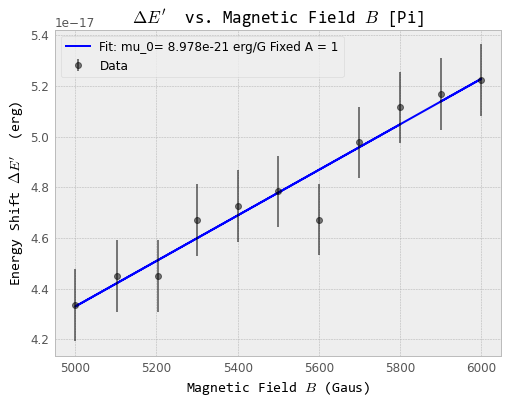

In [77]:
# PLOT2

#style
hfont = {'fontname':'Consolas'}
plt.figure()
plt.style.use('bmh')


# Better looking line
B_line = np.linspace(min(B), max(B), 1000)
fit2 = DelE2(B, *popt2)

#data
plt.plot(B, 
        fit2, 
        label = 'Fit: mu_0= %1.3e erg/G Fixed A = 1' % popt2[0], 
        color = 'b')

plt.errorbar(
    B, 
    delE_90, 
    yerr= sigmaE,
    # xerr= Berr, 
    fmt='o', 
    label = 'Data', 
    color='black',
    alpha =0.5
    )

#labels
plt.title("$\\Delta E'$  vs. Magnetic Field $B$ [Pi]", **hfont)
plt.xlabel('Magnetic Field $B$ (Gaus)', **hfont)
plt.ylabel("Energy Shift $\\Delta E'$  (erg)", **hfont)
plt.legend(loc=2)

print(popt2)

hf.SaveFigure("Graphs/PiFitDelEvsB.png")

In [68]:
# # PLOT3

# #style
# hfont = {'fontname':'Consolas'}
# plt.figure()
# plt.style.use('bmh')


# # Better looking line
# B_line = np.linspace(min(B), max(B), 1000)
# fit3 = DelE3(B, *popt3)

# #data
# plt.plot(B, fit3, label = 'Fit: A= %1.3f' % tuple(popt3), color = 'b')

# plt.errorbar(
#     B, 
#     delE_90, 
#     yerr= sigmaE,
#     # xerr= Berr, 
#     fmt='o', 
#     label = 'Data', 
#     color='black',
#     alpha =0.5
#     )

# #labels
# plt.title("Delta E vs. Magnetic Field B [Pi]", **hfont)
# plt.xlabel('Magnetic Field B (Gaus)', **hfont)
# plt.ylabel('Energy Shift (erg)', **hfont)
# plt.legend(loc=2)

# print(popt3)

# # hf.SaveFigure("PiDelEvsB90Run3_3.png")

In [71]:
# this is with the constraint of A = 1/2
# print('Fit: mu_0 and A')
# hf.Chi2Values(DelE1,B,delE_90,popt1,sigmaE)

print('\n\n')
print('Fit: mu_0, A = 1')
hf.Chi2Values(DelE2,B,delE_90,popt2,sigmaE) # not significant 

# print('\n\n')
# print('Fit: A, mu_0 = 9.2741E-21')
# hf.Chi2Values(DelE3,B,delE_90,popt3,sigmaE)
z = .02 




Fit: mu_0, A = 1
Chi-square:  2.8184270991397633
Degrees of freedom:  9
Reduced chi-square:  0.3131585665710848
CDF:  0.028939418176031333
p-test value (1 Tail bc not symmetric):  0.9710605818239687


In [70]:
# Error Values:
print("Error in Peaks (m)")
sigma_xi_pixel = 2/2
sigma_xi_meter = (2/2)*9*(10)**(-6) #Pixel x 9um x 10E-6= meter
print(sigma_xi_meter)

print('\nError in delta E Values (erg)')
for i in sigmaE: 
    print(i)

print('\n Percent error:')
percentage_error = (np.abs(9.2741E-21-popt2[0])/9.2741E-21)*100
print(percentage_error)

Error in Peaks (m)
9e-06

Error in delta E Values (erg)
1.411324760451414e-18
1.408253470664637e-18
1.4208674571008384e-18
1.414366942939412e-18
1.414366942939412e-18
1.4206026356035592e-18
1.417413132792142e-18
1.4142395421037126e-18
1.4015552496323473e-18
1.4127250801774637e-18
1.4144124838219179e-18

 Percent error:
3.1906653711670723
